In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import ds_fun

Source:
- https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?select=predictive_maintenance.csv

Origionally from:
- https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [2]:
df = pd.read_csv('predictive_maintenance.csv')

- No null values
- shape (10000, 10)
- Possible columns:
    - Delta between air and process temp
    - torque to wear ratio
    - temp to torque
    - speed to torque hue by wear

In [22]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temp Delta [K]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5


In [4]:
df['Temp Delta [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
Temp Delta [K],10000.0,10.00063,1.001094,7.6,9.30,9.8,11.00,12.1


In [6]:
train, val, test = ds_fun.train_validate(df, stratify_col = 'Target')

In [7]:
train.shape[0] + val.shape[0] + test.shape[0] == df.shape[0]

True

In [8]:
target_col = 'Target'

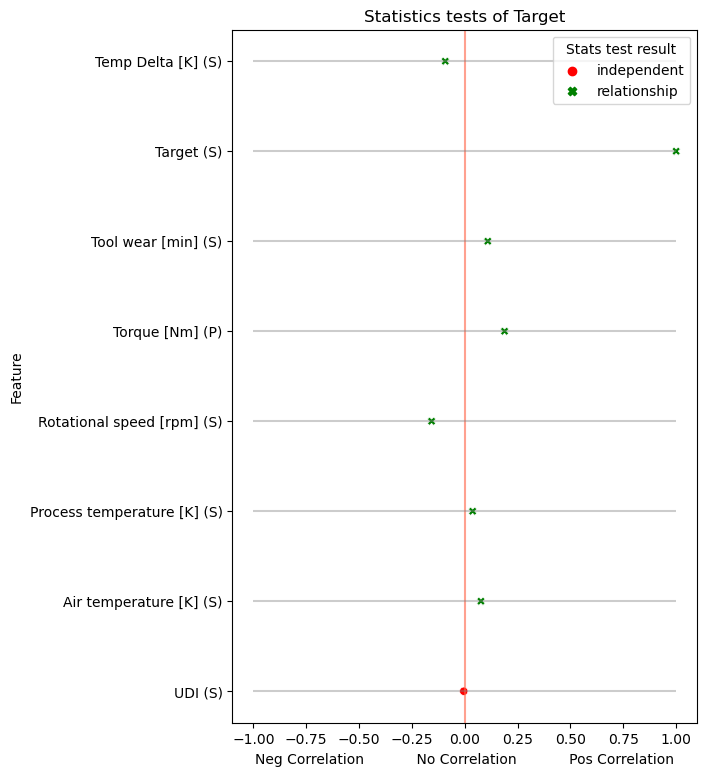

In [9]:
ds_fun.correlation_test(train, target_col)

Takeaways:
 - No strong correlations
 - Strongest seems to be torque (pos corr), tool wear (pos corr), rotational speed (neg corr) and temp delta (neg corr).
 - All features have a statistically relevent relationship with failure except UDI.

(array([   6.,   74.,  285.,  796., 1265., 1280.,  756.,  273.,   57.,
           8.]),
 array([ 3.8 , 11.04, 18.28, 25.52, 32.76, 40.  , 47.24, 54.48, 61.72,
        68.96, 76.2 ]),
 <BarContainer object of 10 artists>)

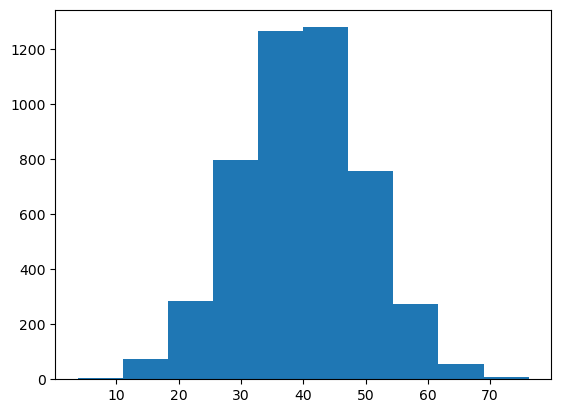

In [10]:
plt.hist(train['Torque [Nm]'])

(array([ 387., 2230., 1490.,  433.,  161.,   53.,   22.,    7.,   14.,
           3.]),
 array([1183. , 1353.3, 1523.6, 1693.9, 1864.2, 2034.5, 2204.8, 2375.1,
        2545.4, 2715.7, 2886. ]),
 <BarContainer object of 10 artists>)

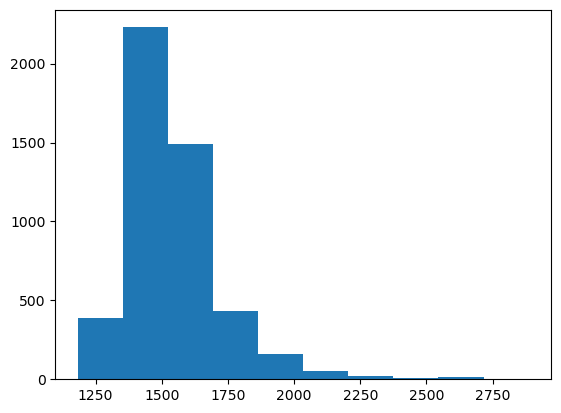

In [11]:
plt.hist(train['Rotational speed [rpm]'])

(array([ 66., 196., 687., 785., 559., 820., 591., 579., 267., 250.]),
 array([295.3 , 296.21, 297.12, 298.03, 298.94, 299.85, 300.76, 301.67,
        302.58, 303.49, 304.4 ]),
 <BarContainer object of 10 artists>)

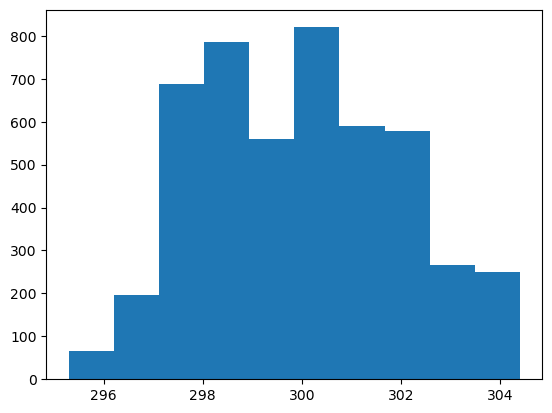

In [12]:
plt.hist(train['Air temperature [K]'])

(array([  47.,   77.,  378.,  815.,  816.,  841., 1036.,  441.,  235.,
         114.]),
 array([305.8, 306.6, 307.4, 308.2, 309. , 309.8, 310.6, 311.4, 312.2,
        313. , 313.8]),
 <BarContainer object of 10 artists>)

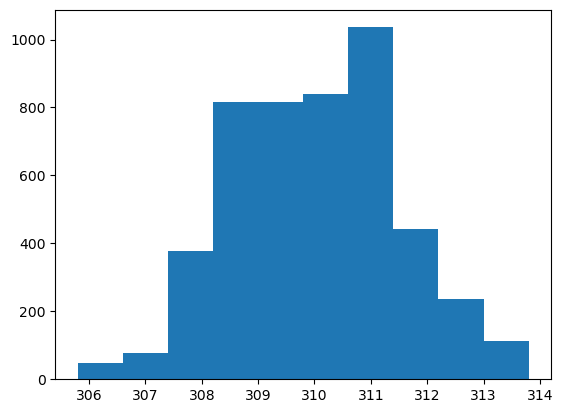

In [13]:
plt.hist(train['Process temperature [K]'])

(array([595., 560., 506., 536., 508., 547., 541., 550., 405.,  52.]),
 array([  0. ,  24.6,  49.2,  73.8,  98.4, 123. , 147.6, 172.2, 196.8,
        221.4, 246. ]),
 <BarContainer object of 10 artists>)

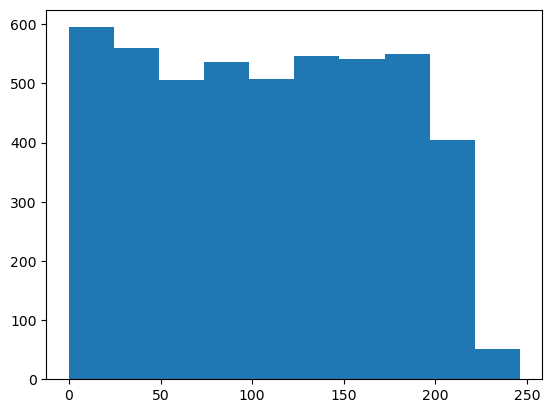

In [14]:
plt.hist(train['Tool wear [min]'])

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

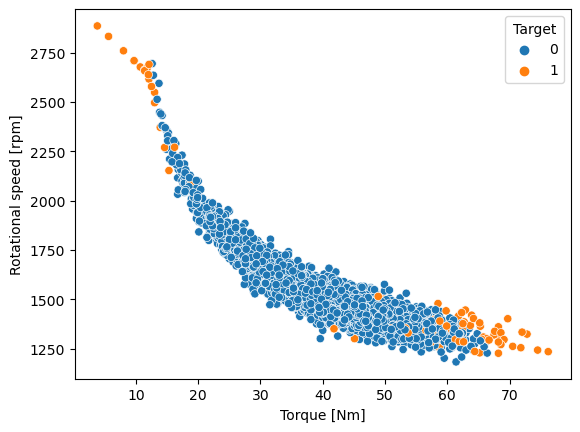

In [15]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Rotational speed [rpm]', hue = 'Target')

Takeaway:
- High and low torque appear to affect failure.
- High speed might affect failure rates.

In [16]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'Temp Delta [K]'],
      dtype='object')

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

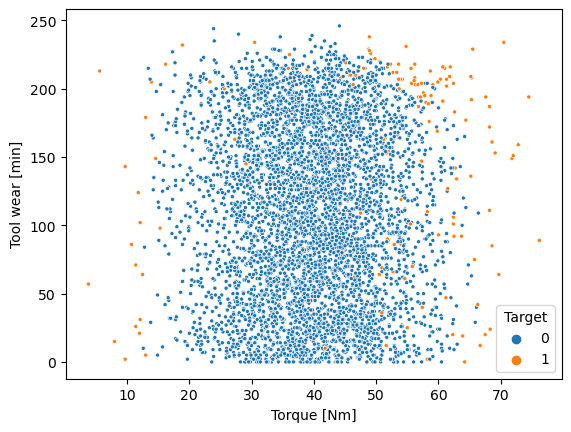

In [17]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Tool wear [min]', hue = 'Target', marker = '.')

Takeaway:
- Small failure cluster around high torque and high tool wear minutes.

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Air temperature [K]'>

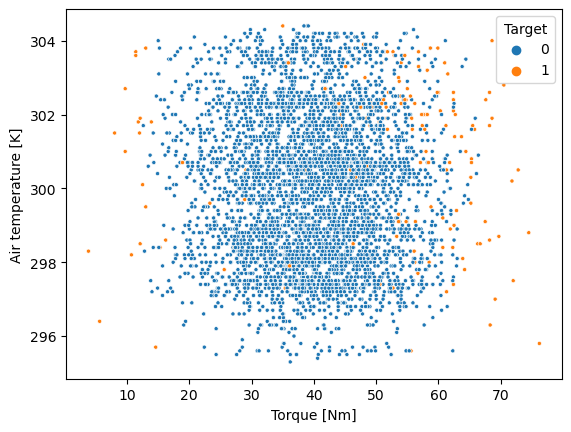

In [18]:
sns.scatterplot(data = train, x = 'Torque [Nm]', y= 'Air temperature [K]', hue = 'Target', marker = '.')

Takeaways:
- Air and Process temp is very similar when compared to torque. It doesn't appear to be relevent.

In [19]:
high_quality = train[train['Type'] == 'H']
med_quality = train[train['Type'] == 'M']
low_quality = train[train['Type'] == 'L']

In [20]:
train[train['Type'] == 'H'].describe().T - train[train['Type'] == 'L'].describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,-2358.0,-199.018696,178.547435,8.0,-4.670000e+02,-268.0,-109.50,4.0
Air temperature [K],-2358.0,-0.187869,0.048792,0.0,-2.000000e-01,-0.5,-0.25,-0.2
Process temperature [K],-2358.0,-0.140603,0.006464,0.0,-1.000000e-01,-0.3,-0.10,-0.2
Rotational speed [rpm],-2358.0,-1.711785,-8.518059,41.0,5.000000e-01,0.0,-6.00,-250.0
Torque [Nm],-2358.0,-0.006098,-0.307510,9.0,5.000000e-02,0.5,0.10,1.0
Tool wear [min],-2358.0,-3.601380,-1.380122,0.0,-1.000000e+00,-5.0,-9.00,-6.0
Target,-2358.0,-0.014987,-0.040919,0.0,0.000000e+00,0.0,0.00,0.0
Temp Delta [K],-2358.0,0.047266,0.027242,0.0,5.684342e-14,0.1,0.00,-0.1


<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

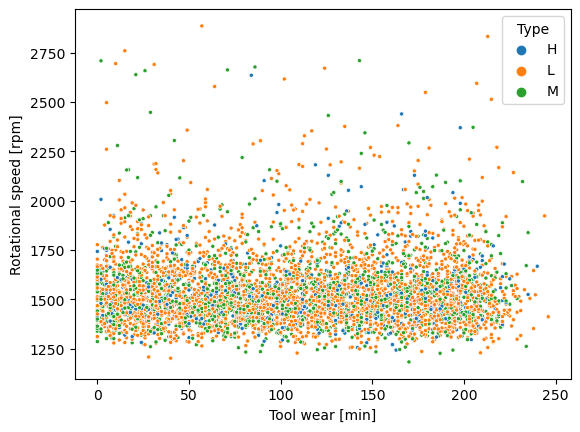

In [21]:
sns.scatterplot(data = train, y = 'Rotational speed [rpm]', x= 'Tool wear [min]', hue = 'Type', marker = '.')

Takeaway:
- Type appears to affect Rotational speed and Tool wear the most.
- I don't see it on a scatter plot very well.